# RandomForestClassifier — Ecoli DataSet

## About DataSet
### Attribute Information
In comments
### Class Distribution
- cp  (cytoplasm) — 143
- im  (inner membrane without signal sequence) — 77               
- pp  (perisplasm) — 52
- imU (inner membrane, uncleavable signal sequence) — 35
- om  (outer membrane) — 20
- omL (outer membrane lipoprotein) — 5
- imL (inner membrane lipoprotein) — 2
- imS (inner membrane, cleavable signal sequence) — 2

### Download link
[THERE](https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/)

## Import modules

In [60]:
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

from statistics import median as mdn
from statistics import mean as mn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load DataSet

In [61]:
names = [
    'sname', # Sequence Name: Accession number for the SWISS-PROT database
    'mcg',   # mcg: McGeoch's method for signal sequence recognition.
    'gvh',   # gvh: von Heijne's method for signal sequence recognition.
    'lip',   # lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute.
    'chg',   # chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute.
    'aac',   # aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins.
    'alm1',  # alm1: score of the ALOM membrane spanning region prediction program.
    'alm2',  # alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.
]

data = pd.read_csv('ecoli.csv', header=None, sep=';', names=names)
data.head()

,sname,mcg,gvh,lip,chg,aac,alm1,alm2
AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


## Make Targets

In [62]:
target = data['alm2']
target.head()

AAT_ECOLI     cp
ACEA_ECOLI    cp
ACEK_ECOLI    cp
ACKA_ECOLI    cp
ADI_ECOLI     cp
Name: alm2, dtype: object

## Change Target type to caty

In [63]:
target = target.astype('category')
print('= data-type')
display(target.dtype)

print('= values')
display(target.values)

= data-type


CategoricalDtype(categories=['cp', 'im', 'imL', 'imS', 'imU', 'om', 'omL', 'pp'], ordered=False)

= values


[cp, cp, cp, cp, cp, ..., pp, pp, pp, pp, pp]
Length: 336
Categories (8, object): [cp, im, imL, imS, imU, om, omL, pp]

## Calculating count of each class

In [64]:
c = Counter(target.values)
c

Counter({'cp': 143,
         'im': 77,
         'imS': 2,
         'imL': 2,
         'imU': 35,
         'om': 20,
         'omL': 5,
         'pp': 52})

## Drop excess column

In [65]:
data = data.drop('alm2', axis=1)
data.head()

,sname,mcg,gvh,lip,chg,aac,alm1
AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35
ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44
ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46
ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36
ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35


## Splitting Data and Target to Train and Test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size=0.148)

print('X_train shape:\t{}'.format(X_train.shape))
print('X_test shape:\t{}'.format(X_test.shape))
print('y_train shape:\t{}'.format(y_train.shape))
print('y_test shape:\t{}'.format(y_test.shape))

X_train shape:	(286, 7)
X_test shape:	(50, 7)
y_train shape:	(286,)
y_test shape:	(50,)


## Testing nude model

In [67]:
rfc_nude = RandomForestClassifier()
rfc_nude.fit(X_train, y_train)

print('Train score:\t{:.2f}'.format(rfc_nude.score(X_train, y_train)))
print('Train score:\t{:.2f}'.format(rfc_nude.score(X_test, y_test)))

Train score:	1.00
Train score:	0.90


## LOOP: n_estimator

In [68]:
n_list = np.arange(1,50)

train_score_list = []
test_score_list = []

for n in n_list:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

### Plot

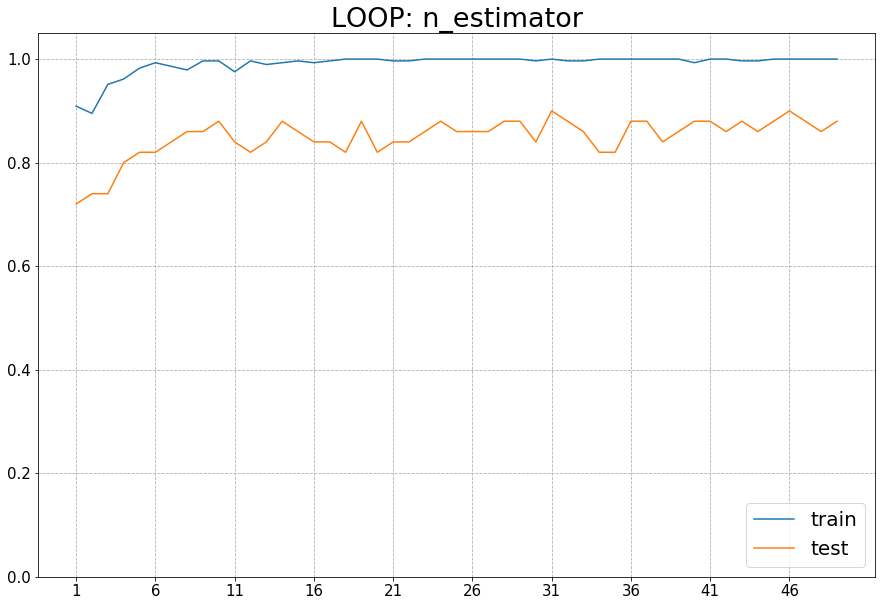

In [69]:
x_ax = np.arange(0, 50, 5)
x_ax_name = x_ax + 1

plt.figure(figsize=(15,10))
plt.plot(train_score_list, label='train')
plt.plot(test_score_list, label='test')
plt.legend(loc=4, prop={'size': 20})
plt.grid(linestyle='--')
plt.ylim(bottom=0, top=1.05)
plt.xticks(x_ax, tuple(x_ax_name), fontsize=15)
plt.yticks(fontsize=15)
plt.title('LOOP: n_estimator', fontsize=27)
plt.show()

### Median and Mean

In [70]:
print('Median test value:\t{:.3f}'.format(mdn(test_score_list)))
print('Mean test value:\t{:.3f}'.format(mn(test_score_list)))

Median test value:	0.860
Mean test value:	0.849


## Wait a minute
### I don't like this conditions
I want to merge same classes to simplify model

In [89]:
for i in range(len(target)):
    if target[i] in ['imS', 'imL', 'imU']:
        target[i] = 'im'
    
    if target[i] == 'omL':
        target[i] = 'om'

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size=0.148)

print('X_train shape:\t{}'.format(X_train.shape))
print('X_test shape:\t{}'.format(X_test.shape))
print('y_train shape:\t{}'.format(y_train.shape))
print('y_test shape:\t{}'.format(y_test.shape))

X_train shape:	(286, 7)
X_test shape:	(50, 7)
y_train shape:	(286,)
y_test shape:	(50,)
Counter({'cp': 119, 'im': 103, 'pp': 45, 'om': 19})
Counter({'cp': 24, 'im': 13, 'pp': 7, 'om': 6})


## LOOP: n_estimator

In [72]:
n_list = np.arange(1,50)

train_score_list = []
test_score_list = []

for n in n_list:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

### Plot

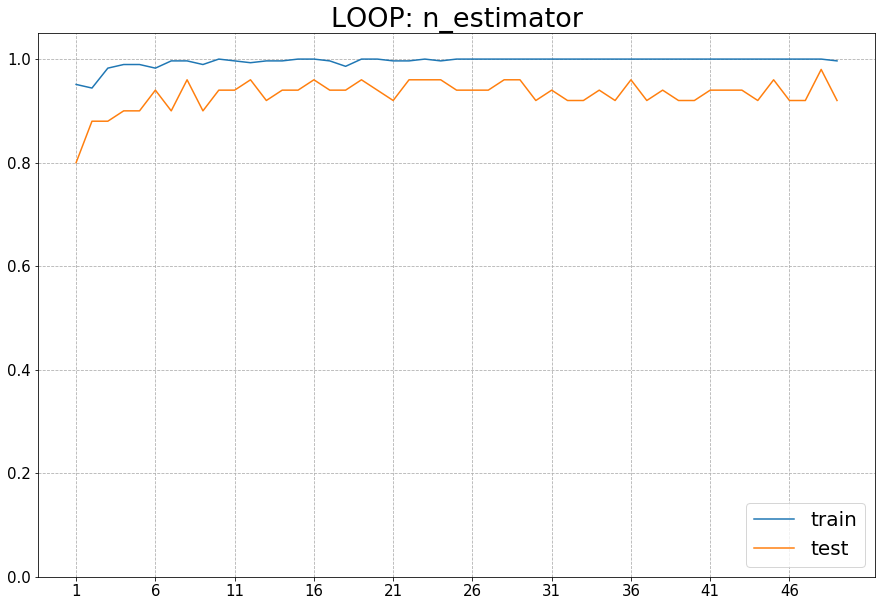

In [73]:
x_ax = np.arange(0, 50, 5)
x_ax_name = x_ax + 1

plt.figure(figsize=(15,10))
plt.plot(train_score_list, label='train')
plt.plot(test_score_list, label='test')
plt.legend(loc=4, prop={'size': 20})
plt.grid(linestyle='--')
plt.ylim(bottom=0, top=1.05)
plt.xticks(x_ax, tuple(x_ax_name), fontsize=15)
plt.yticks(fontsize=15)
plt.title('LOOP: n_estimator', fontsize=27)
plt.show()

### Median and Mean

In [74]:
print('Median test value:\t{:.3f}'.format(mdn(test_score_list)))
print('Mean test value:\t{:.3f}'.format(mn(test_score_list)))

Median test value:	0.940
Mean test value:	0.931


## We choose «n_estimatior»

In [75]:
N_EST = 40

## LOOP: max_features

In [76]:
n_features = len(data.columns)

m_list = np.arange(1, n_features)

train_score_list = []
test_score_list = []

for m in m_list:
    model = RandomForestClassifier(n_estimators=N_EST, max_features=m)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

### Plot

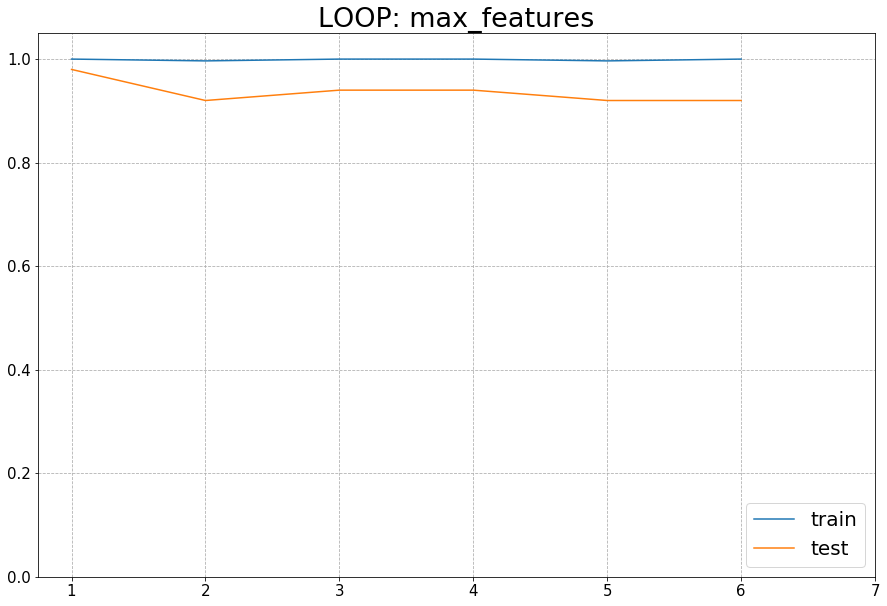

In [77]:
x_ax = np.arange(0, n_features)
x_ax_name = x_ax + 1

plt.figure(figsize=(15,10))
plt.plot(train_score_list, label='train')
plt.plot(test_score_list, label='test')
plt.legend(loc=4, prop={'size': 20})
plt.grid(linestyle='--')
plt.xticks(x_ax, tuple(x_ax_name), fontsize=15)
plt.yticks(fontsize=15)
plt.title('LOOP: max_features', fontsize=27)
plt.ylim(bottom=0, top=1.05)
plt.show()

## We choose «max_features»

In [78]:
M_FEAT = 3

## LOOP: min_samples_split

In [79]:
mss_list = np.arange(2, 20)

train_score_list = []
test_score_list = []

for m in mss_list:
    model = RandomForestClassifier(n_estimators=N_EST, 
                                   max_features=M_FEAT, 
                                   min_samples_split=m)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)## LOOP: max_features

### Plot

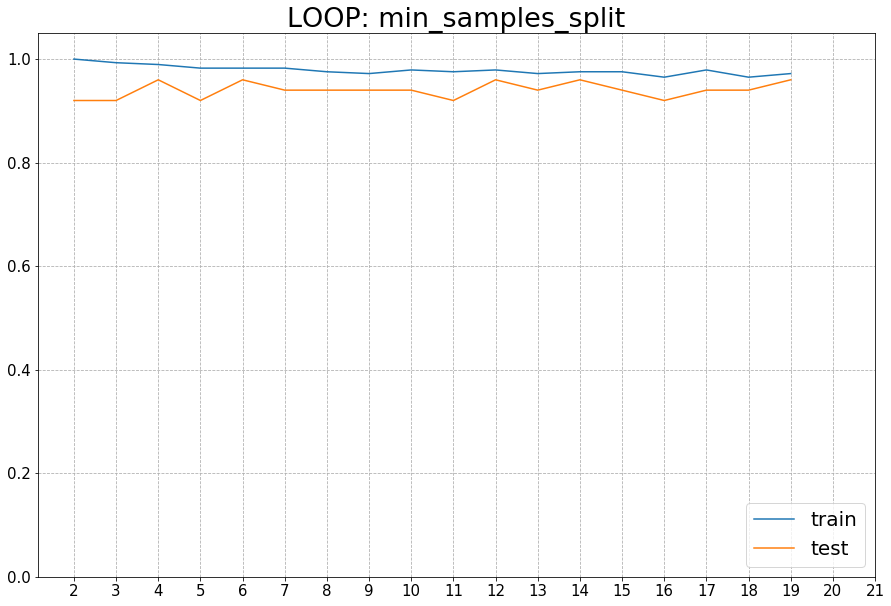

In [80]:
x_ax = np.arange(0, 20)
x_ax_name = x_ax +2

plt.figure(figsize=(15,10))
plt.plot(train_score_list, label='train')
plt.plot(test_score_list, label='test')
plt.legend(loc=4, prop={'size': 20})
plt.grid(linestyle='--')### Plot
plt.xticks(x_ax, tuple(x_ax_name), fontsize=15)
plt.yticks(fontsize=15)
plt.title('LOOP: min_samples_split', fontsize=27)
plt.ylim(bottom=0, top=1.05)
plt.show()

## We choose «min_samples_split»

In [81]:
M_MSS = 15

## LOOP: min_samples_leaf

In [82]:
msl_list = np.arange(1, 50)

train_score_list = []
test_score_list = []

for m in msl_list:
    model = RandomForestClassifier(n_estimators=N_EST, 
                                   max_features=M_FEAT, 
                                   min_samples_split=M_MSS, 
                                   min_samples_leaf=m)
    model.fit(X_train, y_train)
    ## LOOP: min_samples_split
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

### Plot

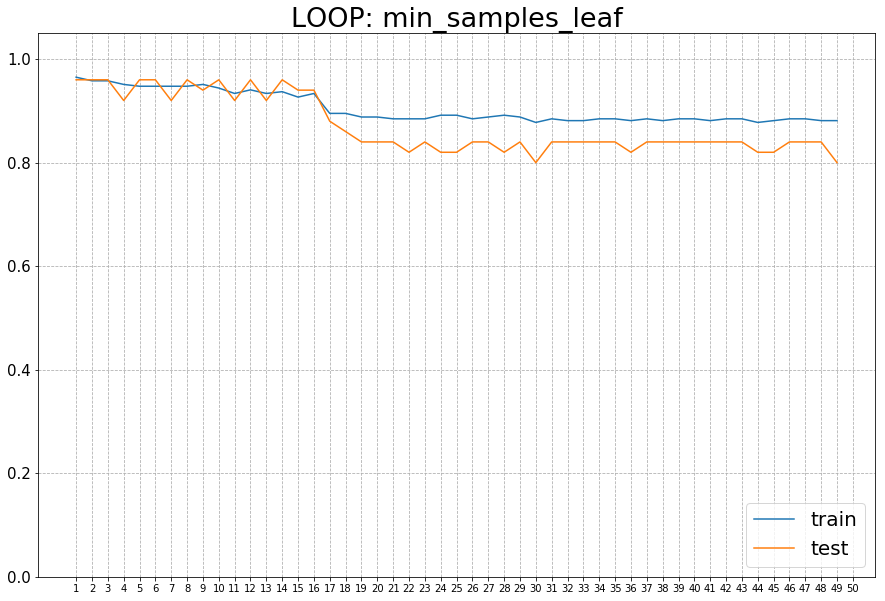

In [83]:
x_ax = np.arange(0, 50)
x_ax_name = x_ax + 1

plt.figure(figsize=(15,10))
plt.plot(train_score_list, label='train')
plt.plot(test_score_list, label='test')
plt.legend(loc=4, prop={'size': 20})
plt.grid(linestyle='--')
plt.xticks(x_ax, tuple(x_ax_name), fontsize=10)
plt.yticks(fontsize=15)
plt.title('LOOP: min_samples_leaf', fontsize=27)### Plot
plt.ylim(bottom=0, top=1.05)
plt.show()

## We choose «min_samples_leaf»

In [84]:
M_MSL = 4

## LOOP: max_depth

In [85]:
d_depth_list = np.arange(1, 50)

train_score_list = []
test_score_list = []

for d in d_depth_list:
    model = RandomForestClassifier(n_estimators=N_EST, 
                                   max_features=M_FEAT, 
                                   min_samples_split=M_MSS, 
                                   min_samples_leaf=M_MSL, 
                                   max_depth=d)
    model.fit(X_train, y_train)
    ## LOOP: min_samples_leaf
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

### Plot

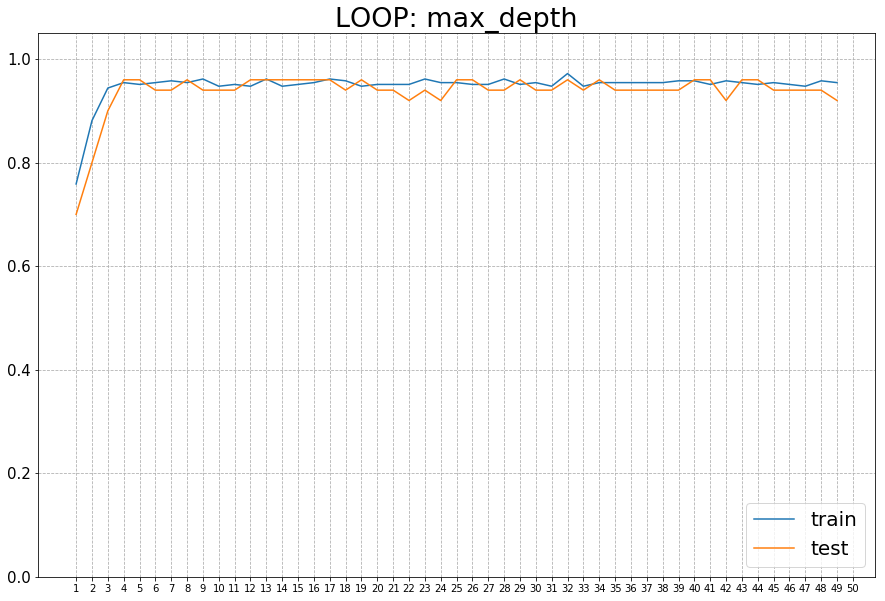

In [86]:
x_ax = np.arange(0, 50)
x_ax_name = x_ax + 1

plt.figure(figsize=(15,10))
plt.plot(train_score_list, label='train')
plt.plot(test_score_list, label='test')
plt.legend(loc=4, prop={'size': 20})
plt.grid(linestyle='--')
plt.xticks(x_ax, tuple(x_ax_name), fontsize=10)
plt.yticks(fontsize=15)
plt.title('LOOP: max_depth', fontsize=27)
plt.ylim(bottom=0, top=1.05)
plt.show()

## We choose «max_depth»

In [87]:
D_DEP = 10

# Best models

In [88]:
c_crit = ['gini', 'entropy']

train_score_list = []
test_score_list = []

print('= BEST MODELS =', end='\n\n')

for c in c_crit:
    model = RandomForestClassifier(n_estimators=N_EST, 
                                   max_features=M_FEAT, 
                                   min_samples_split=M_MSS, 
                                   min_samples_leaf=M_MSL, 
                                   max_depth=D_DEP, 
                                   criterion=c)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    
    print(c)
    print('Train score\t{:.3f}'.format(train_score))
    print('Test score\t{:.3f}'.format(test_score), end='\n\n')

= BEST MODELS =

gini
Train score	0.955
Test score	0.940

entropy
Train score	0.955
Test score	0.960



![tenor](tenor.gif)